# The Sparks Foundation

# Data Science & Business Analytics Intern

## Task7:Stock Market Prediction using Numerical and Textual Analysis

# Chetan Kumar

### importing libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Textual Analysis

### importing data

In [66]:
data_text_analysis=pd.read_csv(r'C:\Users\wlpch\Downloads\india-news-headlines.csv')

### analysis and visualisation

In [67]:
data_text_analysis.head()

publish_date headline_category  \
0      20030714      home.science   
1      20030714      home.science   
2      20030714      home.science   
3      20030714      home.science   
4      20030714             india   

                                   headline_text  
0                     Hot enough or fast enough?  
1                           Fat can be addictive  
2          Scientific solution to save your skin  
3     Mars comes close to Earth after 73;000 yrs  
4  Now; get paid for leading an extravagant life

In [68]:
data_text_analysis.tail()

publish_date                 headline_category  \
3072428      20200630                      gadgets-news   
3072429      20200630     entertainment.hindi.bollywood   
3072430      20200630     entertainment.hindi.bollywood   
3072431      20200630     entertainment.hindi.bollywood   
3072432      20200630  entertainment.telugu.movies.news   

                                             headline_text  
3072428      why tiktok removed 1 65 crore videos in india  
3072429  apurva asrani calls alia bhatts mother soni ra...  
3072430  kangana ranaut gets a doll version of herself ...  
3072431  meezaan jaffrey reminisces his childhood days ...  
3072432  prabhas20 titled as radhe shyam prabhas and po...

In [69]:
print('Rows                :',data_text_analysis.shape[0])
print('Columns             :',data_text_analysis.shape[1])
print('Total Missing Values:',data_text_analysis.isnull().sum().values.sum())

Rows                : 3072433
Columns             : 3
Total Missing Values: 0


In [70]:
data_text_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072433 entries, 0 to 3072432
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 70.3+ MB


In [71]:
data_text_analysis['publish_date'] = pd.to_datetime(data_text_analysis['publish_date'], format = '%Y%m%d')

In [72]:
data_text_analysis['headline_category'].unique()

array(['home.science', 'india', 'city.ahmedabad', 'city.chandigarh',
       'city.hyderabad', 'city.lucknow', 'city.delhi', 'city.kolkata',
       'city.pune', 'city.patna', 'world.us', 'city.bengaluru',
       'business.india-business', 'entertainment.hindi.bollywood',
       'city.thiruvananthapuram', 'business.international-business',
       'city.mumbai', 'sports.new-zealand-in-india-2016',
       'world.pakistan', 'sports.new-zealand-in-india-2016.interviews',
       'entertainment.english.hollywood',
       'home.sunday-times.all-that-matters',
       'home.sunday-times.deep-focus', 'removed', 'unknown', 'cricket',
       'edit-page', 'lucknow-times', 'delhi-times', 'bombay-times',
       'calcutta-times', 'videos', 'hyderabad-times', 'pune-times',
       'citizens-grievances', 'ahmedabad-events', 'bangalore-times',
       'ahmedabad-times', 'sports.icc-world-cup-2015', 'delhi',
       'hyderabad.local-sports', 'chhattisgarh', 'talk-radio',
       'rajasthan', 'madhya-pradesh', '

In [73]:
data_text_analysis['headline_category'].value_counts()

india                      260211
unknown                    169065
city.mumbai                123836
city.delhi                 115048
business.india-business    103682
                            ...  
sports.headline6                3
ahmedabad-events                2
party-manifestos                2
recipes                         1
war-on-iraq.news                1
Name: headline_category, Length: 996, dtype: int64

In [74]:
data_text_analysis['headline_category'].value_counts().count()

996

In [75]:
data_text_analysis['headline_text'].value_counts()

Sunny Leone HOT photos                                    98
Watch top news in one-minute                              90
Official Site                                             89
Football: Italian Serie A table                           88
Football: Spanish La Liga table                           86
                                                          ..
Agassi vows to wow again                                   1
Do Pakistanis need AC?                                     1
Karthik's dad is Nanditha's dad too!                       1
Muslim families mediating between Mirzas and Siddiquis     1
Guirim; Arambol witness agitations                         1
Name: headline_text, Length: 2869593, dtype: int64

In [76]:
data_text_analysis['headline_text'].value_counts().count()

2869593

In [77]:
data_text_analysis.duplicated().sum()

20232

In [78]:
data_text_analysis.duplicated(keep=False).sum()

39025

In [79]:
data_text_analysis.sort_values(by=['publish_date','headline_category','headline_text'],inplace=True,ignore_index=True)

In [80]:
data_text_analysis

publish_date                                  headline_category  \
0         2003-07-14                            business.india-business   
1         2003-07-14                            business.india-business   
2         2003-07-14                            business.india-business   
3         2003-07-14                            business.india-business   
4         2003-07-14                            business.india-business   
...              ...                                                ...   
3072428   2020-06-30       life-style.parenting.toddler-year-and-beyond   
3072429   2020-06-30                  life-style.relationships.love-sex   
3072430   2020-06-30                      life-style.relationships.work   
3072431   2020-06-30  most-searched-products.health-and-fitness.heal...   
3072432   2020-06-30                                    tv.news.marathi   

                                             headline_text  
0                 Daewoo staff; lenders work out wage deal  
1              Govt writes to Star on shareholding pattern  
2                          HDFC Bank Q1 net jumps 30.17 pc  
3          HPCL divestment time-table soon to be finalised  
4                    Hyundai Heavy bags $220 mn ONGC order  
...                                                    ...  
3072428  Prince William and Kate Middleton use this par...  
3072429     Women find men with cats less desirable: Study  
3072430       How to find a job during the economic crisis  
3072431  pulse oximeter monitor your pulse rate and blo...  
3072432             Shivani Rangole moves into a new abode  

[3072433 rows x 3 columns]

In [81]:
data_text_analysis.drop_duplicates(keep='last',inplace=True,ignore_index=True)

In [82]:
data_text_analysis.duplicated().sum()

0

In [83]:
pub_date_value = data_text_analysis['publish_date'].value_counts().index.tolist()

In [84]:
len(pub_date_value)

6197

In [86]:
new=[]
for x in pub_date_value:
    df = data_text_analysis.loc[data_text_analysis['publish_date']==x]
    head_line_text=''
    publish_date= str(x)
    head_line_text=df['headline_text'].iloc[0]
    for i in range(1,len(df)):
        head_line_text=head_line_text+'.'+df['headline_text'].iloc[i]
    new.append(head_line_text)

text_data_analysis=pd.DataFrame({'publish_date':pub_date_value,'head_line':new})

In [88]:
text_data_analysis

publish_date                                          head_line
0      2018-07-31  Harley Davidson plans smaller bike with eye on...
1      2018-12-31  Court extends detention for Nissan ex-chair Gh...
2      2018-12-30  expect to nearly treble sales in india in 2019...
3      2014-12-31  Exclusive! BMW i8 India launch in February 201...
4      2017-12-31  53k casual jobs lost in Jan-Mar;overall employ...
...           ...                                                ...
6192   2005-07-24  Claridges charts Rs 450-cr plan.FM's remark ma...
6193   2005-03-27  ITC charts Rs 14;000 cr expansion plan.Post-Ho...
6194   2004-12-26  Ambanis meet mother before D-day.Buzz in motow...
6195   2005-07-17  Broker Jhunjhunwala may buy Aptech.Chandrasekh...
6196   2004-11-13  Now; more AI flights to US.Bags packed; but wi...

[6197 rows x 2 columns]

In [89]:
text_data_analysis.sort_values('publish_date',inplace=True,ignore_index=True)

In [90]:
text_data_analysis

publish_date                                          head_line
0      2003-07-14  Daewoo staff; lenders work out wage deal.Govt ...
1      2003-07-15  Benchmark Mutual floats new liquid fund.Big Th...
2      2003-07-16  BMW to set up JV in India.CRISIL assigns highe...
3      2003-07-17  Continental Airline aborts India plan.Dell CEO...
4      2003-07-18  Airtel receives Govt nod for additional spectr...
...           ...                                                ...
6192   2020-06-26  Amazon; Bigbasket ask sellers for 'origin coun...
6193   2020-06-27  horoscope today 09 july 2020 check astrologica...
6194   2020-06-28  Weekly Horoscope; 28 June to 04 July 2020: Che...
6195   2020-06-29  Amazon to hire 20k more temp staff.Can't fault...
6196   2020-06-30  horoscope today 10 july 2020 check astrologica...

[6197 rows x 2 columns]

In [91]:
from textblob import TextBlob
polarity=[]
subjectivity=[]
for non_use,hdlin in text_data_analysis.iterrows():
    polarity.append(TextBlob(hdlin['head_line']).sentiment[0])
    subjectivity.append(TextBlob(hdlin['head_line']).sentiment[1])

text_data_analysis['polarity']=polarity
text_data_analysis['subjectivity']=subjectivity

In [92]:
text_data_analysis

publish_date                                          head_line  \
0      2003-07-14  Daewoo staff; lenders work out wage deal.Govt ...   
1      2003-07-15  Benchmark Mutual floats new liquid fund.Big Th...   
2      2003-07-16  BMW to set up JV in India.CRISIL assigns highe...   
3      2003-07-17  Continental Airline aborts India plan.Dell CEO...   
4      2003-07-18  Airtel receives Govt nod for additional spectr...   
...           ...                                                ...   
6192   2020-06-26  Amazon; Bigbasket ask sellers for 'origin coun...   
6193   2020-06-27  horoscope today 09 july 2020 check astrologica...   
6194   2020-06-28  Weekly Horoscope; 28 June to 04 July 2020: Che...   
6195   2020-06-29  Amazon to hire 20k more temp staff.Can't fault...   
6196   2020-06-30  horoscope today 10 july 2020 check astrologica...   

      polarity  subjectivity  
0     0.004488      0.407510  
1     0.060951      0.463912  
2     0.071989      0.377288  
3    -0.001134      0.381743  
4    -0.076506      0.395519  
...        ...           ...  
6192  0.085772      0.381184  
6193  0.084847      0.388314  
6194  0.071298      0.389494  
6195  0.051317      0.379058  
6196  0.070518      0.377398  

[6197 rows x 4 columns]

# Checking stock data

### importing data

In [109]:
data_stock=pd.read_csv(r'C:\Users\wlpch\Downloads\1997_2021.csv')

In [110]:
data_stock.head()

Date         Open         High          Low        Close    Adj Close  \
0  14-07-03  3704.629883  3726.560059  3704.629883  3720.750000  3720.750000   
1  15-07-03  3719.169922  3733.879883  3657.179932  3686.340088  3686.340088   
2  16-07-03  3702.139893  3729.020020  3662.699951  3721.649902  3721.649902   
3  17-07-03  3728.840088  3750.000000  3660.340088  3668.909912  3668.909912   
4  18-07-03  3651.389893  3684.229980  3625.729980  3647.580078  3647.580078   

    Volume  
0  21200.0  
1  22800.0  
2  18400.0  
3  22000.0  
4  22000.0

### analysis and visualsation

In [111]:
print('Rows                :',data_stock.shape[0])
print('Columns             :',data_stock.shape[1])
print('Total Missing Values:',data_stock.isnull().sum().values.sum())

Rows                : 4364
Columns             : 7
Total Missing Values: 1342


In [112]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4364 entries, 0 to 4363
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4210 non-null   object 
 1   Open       4166 non-null   float64
 2   High       4166 non-null   float64
 3   Low        4166 non-null   float64
 4   Close      4166 non-null   float64
 5   Adj Close  4166 non-null   float64
 6   Volume     4166 non-null   float64
dtypes: float64(6), object(1)
memory usage: 238.8+ KB


In [128]:
data_stock.dropna(inplace=True)

In [129]:
data_stock.tail()

Date         Open         High          Low        Close  \
4205  24-06-20  35679.73828  35706.55078  34794.92969  34868.98047   
4206  25-06-20  34525.39063  35081.60938  34499.78125  34842.10156   
4207  26-06-20  35144.78125  35254.87891  34910.33984  35171.26953   
4208  29-06-20  34926.94922  35032.35938  34662.05859  34961.51953   
4209  30-06-20  35168.30078  35233.91016  34812.80078  34915.80078   

        Adj Close   Volume  
4205  34868.98047  26600.0  
4206  34842.10156  24600.0  
4207  35171.26953  24800.0  
4208  34961.51953  18300.0  
4209  34915.80078  18500.0

In [132]:
data_stock.isnull().sum().values.sum()

0

In [133]:
temp=data_stock['Date'].str.split("-",expand=True)

In [139]:
temp[2]="20" +temp[2]

In [142]:
data_stock['Date']=temp[2]+"-"+temp[1]+"-"+temp[0]

In [150]:
data_stock['Date'] = data_stock['Date'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [153]:
data_stock['Date'] = pd.to_datetime(data_stock['Date'],format='%Y%m%d')

In [159]:
def stockweekmovavg(week,df,col):
    date_close_data=pd.DataFrame({'Date':df['Date'],'Close':df[col]})
    date_close_data.set_index('Date',inplace=True)
    num=week*5
    date_close_data['mov_avg']=date_close_data[col].rolling(num).mean().shift()
    return date_close_data.dropna()

In [160]:
stockweekmovavg(4,data_stock,'Close').head()

Close      mov_avg
Date                                
2003-08-11  3893.409912  3723.223498
2003-08-12  3889.409912  3731.856494
2003-08-13  3926.070068  3742.009985
2003-08-14  3921.199951  3752.230994
2003-08-18  3977.729980  3764.845496

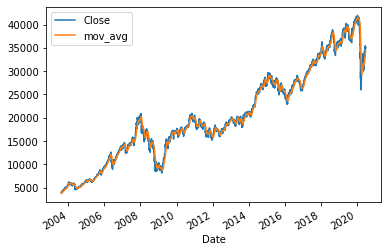

In [167]:
stockweekmovavg(4, data_stock,'Close').plot();

In [179]:
import statsmodels.api as sm 

In [184]:
altdata_fourweek = stockweekmovavg(4,data_stock,'Close')
altdata_fourweek.reset_index(inplace=True)
altdata_fourweek.rename(columns={list(altdata_fourweek)[0]:'Date'}, inplace=True)

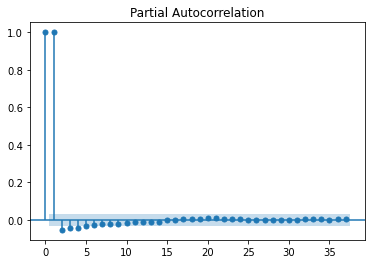

In [185]:
plotfourweek = altdata_fourweek.filter(['Date', 'mov_avg'], axis=1)
plotfourweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_fourweek['Date']))) 
del plotfourweek['Date']
sm.graphics.tsa.plot_pacf(plotfourweek.values.squeeze())
plt.show()

In [189]:
altr.Chart(altdata_fourweek).mark_point().encode(
    x='Date',
    y='mov_avg'
)

alt.Chart(...)

In [190]:
stockweekmovavg(16,data_stock,'Close').head()

Close      mov_avg
Date                                
2003-11-05  5064.910156  4256.651736
2003-11-06  5047.540039  4273.453738
2003-11-07  4971.569824  4290.468738
2003-11-10  4998.569824  4306.092737
2003-11-11  5030.640137  4322.713486

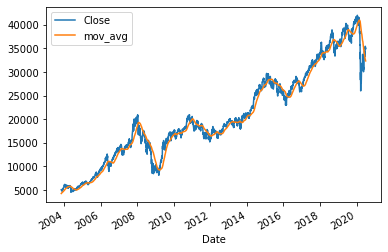

In [191]:
stockweekmovavg(16, data_stock,'Close').plot();

In [221]:
altdata_sixteenweek = stockweekmovavg(16, data_stock,'Close')
altdata_sixteenweek.reset_index(inplace=True)
altdata_sixteenweek.rename(columns={list(altdata_sixteenweek)[0]:'Date'}, inplace=True)

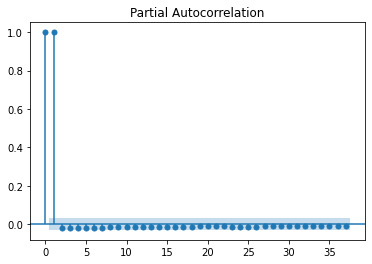

In [223]:
plotsixteenweek = altdata_sixteenweek.filter(['Date', 'mov_avg'], axis=1)
plotsixteenweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_sixteenweek['Date']))) 
del plotsixteenweek['Date']
sm.graphics.tsa.plot_pacf(plotsixteenweek.values.squeeze())
plt.show()

In [225]:
altr.Chart(altdata_sixteenweek).mark_point().encode(
    x='Date',
    y='mov_avg'
)

alt.Chart(...)

In [197]:
stockweekmovavg(32,data_stock,'Close').head()

Close      mov_avg
Date                                
2004-03-04  5815.870117  4908.246492
2004-03-05  5880.350098  4921.340993
2004-03-08  5935.189941  4935.053555
2004-03-09  5850.609863  4948.888181
2004-03-10  5759.290039  4962.523805

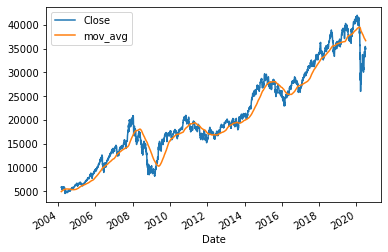

In [198]:
stockweekmovavg(32, data_stock,'Close').plot();

In [228]:
altdata_thirtytwonweek = stockweekmovavg(32, data_stock,'Close')
altdata_thirtytwonweek.reset_index(inplace=True)
altdata_thirtytwonweek.rename(columns={list(altdata_thirtytwonweek)[0]:'Date'}, inplace=True)

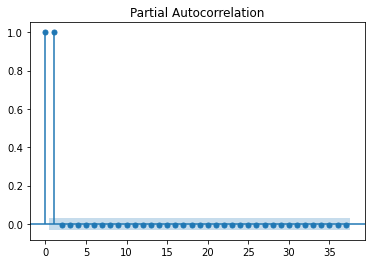

In [229]:
plotthirtytwoweek = altdata_thirtytwonweek.filter(['Date', 'mov_avg'], axis=1)
plotthirtytwoweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(plotthirtytwoweek['Date']))) 
del plotthirtytwoweek['Date']
sm.graphics.tsa.plot_pacf(plotthirtytwoweek.values.squeeze())
plt.show()

In [231]:
altr.Chart(altdata_thirtytwonweek).mark_point().encode(
    x='Date',
    y='mov_avg'
)

alt.Chart(...)

In [208]:
stockweekmovavg(52,data_stock,'Close').head()

Close      mov_avg
Date                                
2004-07-27  5075.879883  5045.560377
2004-07-28  5070.290039  5050.772415
2004-07-29  5120.450195  5056.095299
2004-07-30  5170.319824  5061.475300
2004-08-02  5202.529785  5067.249954

<AxesSubplot:xlabel='Date'>

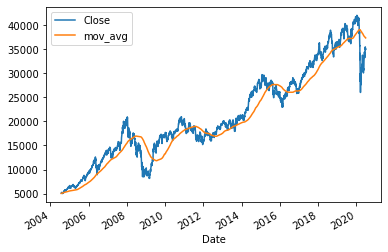

In [209]:
stockweekmovavg(52,data_stock,'Close').plot()

In [210]:
altdata_fiftytwoweek = stockweekmovavg(52,data_stock,'Close')
altdata_fiftytwoweek.reset_index(inplace=True)
altdata_fiftytwoweek.rename(columns={list(altdata_fiftytwoweek)[0]:'Date'}, inplace=True)

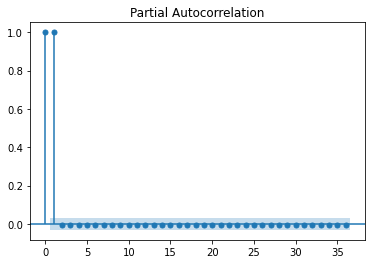

In [211]:
plotfiftytwoweek = altdata_fiftytwoweek.filter(['Date', 'mov_avg'], axis=1)
plotfiftytwoweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_fiftytwoweek['Date']))) 
del plotfiftytwoweek['Date']
sm.graphics.tsa.plot_pacf(plotfiftytwoweek.values.squeeze())
plt.show()

In [214]:
altr.Chart(altdata_fiftytwoweek).mark_point().encode(
    x='Date',
    y='mov_avg'
)

alt.Chart(...)

In [235]:
def rolling_window(days, df):
    data_temp = df.filter(['Date','Open','High','Low','Close'], axis=1)
    data_temp.set_index('Date', inplace=True)
    rolling_windows_data = data_temp.rolling(window=days).mean().shift()
    return rolling_windows_data.dropna()

In [237]:
rolling_window(10, data_stock).head()

Open         High          Low        Close
Date                                                          
2003-07-28  3657.121973  3688.200000  3619.535962  3654.135986
2003-07-29  3661.257984  3693.108984  3622.079980  3656.036987
2003-07-30  3662.526001  3696.856006  3625.855981  3663.846973
2003-07-31  3668.488013  3703.942993  3635.583984  3669.723975
2003-08-01  3675.257007  3712.517993  3648.061987  3682.093994

<AxesSubplot:xlabel='Date'>

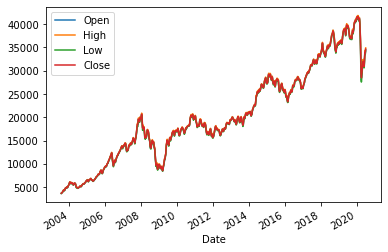

In [239]:
rolling_window(10, data_stock).plot()

In [240]:
altdata_tenweek = rolling_window(10, data_stock)
altdata_tenweek.reset_index(inplace=True)
altdata_tenweek.rename(columns={list(altdata_tenweek)[0]:'Date'}, inplace=True)

In [246]:
altr.Chart(altdata_tenweek).mark_point().encode(
    x='Date',
    y='Close'
)

alt.Chart(...)

In [247]:
rolling_window(50, data_stock).head()

Open         High          Low        Close
Date                                                          
2003-09-23  4001.156992  4038.988789  3960.833374  3999.541196
2003-09-24  4009.824590  4049.257988  3968.971577  4009.759995
2003-09-25  4020.439795  4061.916992  3980.425381  4023.160996
2003-09-26  4033.341597  4074.550996  3992.871577  4034.670996
2003-09-29  4044.757998  4087.327598  4005.657978  4048.944194

<AxesSubplot:xlabel='Date'>

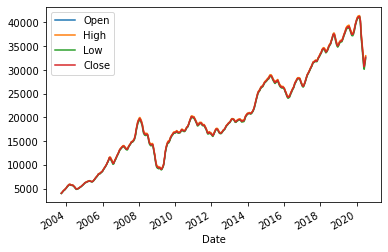

In [248]:
rolling_window(50, data_stock).plot()

In [249]:
altdata_fiftyweek = rolling_window(50, data_stock)
altdata_fiftyweek.reset_index(inplace=True)
altdata_fiftyweek.rename(columns={list(altdata_fiftyweek)[0]:'Date'}, inplace=True)

In [250]:
altr.Chart(altdata_fiftyweek).mark_point().encode(
    x='Date',
    y='Close'
)

alt.Chart(...)

comparing the percentage of last day and today that is more than the given percentage and alloting the gap as 0 or 1,if the gap is more than the given criteria

In [277]:
def gap_perc(perc,df,col):
    df=df.filter(['Date',col],axis=1)
    df.set_index('Date',inplace=True)
    df['perc_chk']=((df - df.shift(1))/df.shift(1))*100
    df['perc_gap'] = df['perc_chk'].apply(lambda x: 1 if x >= perc else 0)
    return df.dropna()

In [279]:
gap_perc(10,data_stock,'Volume').head()

Volume   perc_chk  perc_gap
Date                                    
2003-07-15  22800.0   7.547170         0
2003-07-16  18400.0 -19.298246         0
2003-07-17  22000.0  19.565217         1
2003-07-18  22000.0   0.000000         0
2003-07-21  19400.0 -11.818182         0

In [280]:
altdata_volperc_chg = gap_perc(10,data_stock,'Volume')
altdata_volperc_chg.reset_index(inplace=True)
altdata_volperc_chg.rename(columns={list(altdata_volperc_chg)[0]:'Date'}, inplace=True)

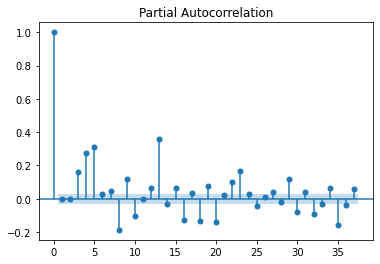

In [282]:
plotvolperc_chg = altdata_volperc_chg.filter(['Date', 'perc_chk'], axis=1)
plotvolperc_chg.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_volperc_chg['Date']))) 
del plotvolperc_chg['Date']
sm.graphics.tsa.plot_pacf(plotvolperc_chg.values.squeeze())
plt.show()

In [285]:
altr.Chart(altdata_volperc_chg).mark_point().encode(
    x='Date',
    y='perc_chk'
)

alt.Chart(...)

In [297]:
gap_perc(2,data_stock,'Close').head()

Close  perc_chk  perc_gap
Date                                       
2003-07-15  3686.340088 -0.924811         0
2003-07-16  3721.649902  0.957856         0
2003-07-17  3668.909912 -1.417113         0
2003-07-18  3647.580078 -0.581367         0
2003-07-21  3569.580078 -2.138404         0

In [298]:
altdata_close_2perc_chg = gap_perc(2,data_stock,'Close')
altdata_close_2perc_chg.reset_index(inplace=True)
altdata_close_2perc_chg.rename(columns={list(altdata_close_2perc_chg)[0]:'Date'}, inplace=True)

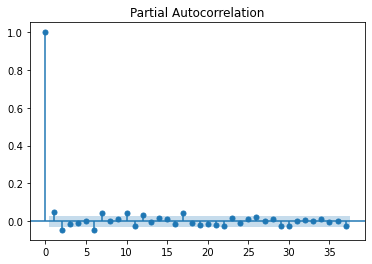

In [299]:
plotclose_2perc_chg = altdata_close_2perc_chg.filter(['Date', 'perc_chk'], axis=1)
plotclose_2perc_chg.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_close_2perc_chg['Date']))) 
del plotclose_2perc_chg['Date']
sm.graphics.tsa.plot_pacf(plotclose_2perc_chg.values.squeeze())
plt.show()

In [300]:
altr.Chart(altdata_close_perc_chg).mark_point().encode(
    x='Date',
    y='perc_chk'
)

alt.Chart(...)

In [301]:
gap_perc(10,data_stock,'Close').head()

Close  perc_chk  perc_gap
Date                                       
2003-07-15  3686.340088 -0.924811         0
2003-07-16  3721.649902  0.957856         0
2003-07-17  3668.909912 -1.417113         0
2003-07-18  3647.580078 -0.581367         0
2003-07-21  3569.580078 -2.138404         0

In [304]:
altdata_close_10perc_chg = gap_perc(10,data_stock,'Close')
altdata_close_10perc_chg.reset_index(inplace=True)
altdata_close_10perc_chg.rename(columns={list(altdata_close_10perc_chg)[0]:'Date'}, inplace=True)

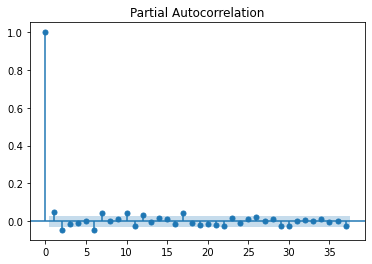

In [381]:
plotclose_10perc_chg = altdata_close_10perc_chg.filter(['Date', 'perc_chk'], axis=1)
plotclose_10perc_chg.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_close_10perc_chg['Date']))) 
del plotclose_10perc_chg['Date']
sm.graphics.tsa.plot_pacf(plotclose_10perc_chg.values.squeeze())
plt.show()

In [382]:
altr.Chart(altdata_close_10perc_chg).mark_point().encode(
    x='Date',
    y='perc_chk'
)

alt.Chart(...)

In [386]:
def pivot_gap_perc(perc,df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.filter(['Date', 'High', 'Low','Close'], axis=1)
    df.set_index('Date', inplace=True)
    df['pivot_point'] = (df['High'] + df['Low'] + df['Close']) / 3
    df.drop(['High', 'Low', 'Close'], axis = 1, inplace = True)
    df['pivot_gap_perct'] =((df - df.shift(1))/df.shift(1))*100
    df['pivot_gap_perct'] = df['pivot_gap_perct'].apply(lambda x: 1 if x >= perc else 0)
    return df.dropna()

In [387]:
pivot_gap_perc(10,data_stock).head()

pivot_point  pivot_gap_perct
Date                                    
2003-07-14  3717.313314                0
2003-07-15  3692.466634                0
2003-07-16  3704.456624                0
2003-07-17  3693.083333                0
2003-07-18  3652.513346                0

In [388]:
altdata_pivot_perc_chg = pivot_gap_perc(10,data_stock)
altdata_pivot_perc_chg.reset_index(inplace=True)
altdata_pivot_perc_chg.rename(columns={list(altdata_pivot_perc_chg)[0]:'Date'}, inplace=True)

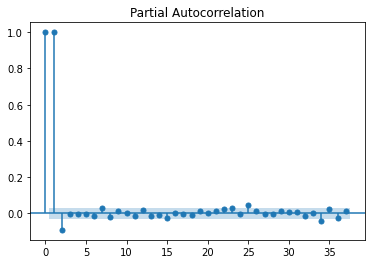

In [389]:
plotpivot_perc_chg = altdata_pivot_perc_chg.filter(['Date', 'pivot_point'], axis=1) #df.copy()
plotpivot_perc_chg.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_pivot_perc_chg['Date']))) 
del plotpivot_perc_chg['Date']
sm.graphics.tsa.plot_pacf(plotpivot_perc_chg.values.squeeze())
plt.show()

In [390]:
altr.Chart(altdata_pivot_perc_chg).mark_point().encode(
    x='Date',
    y='pivot_point'
)

alt.Chart(...)

In [391]:
def rev_gap_perc(perc,df,col):
    df=df.filter(['Date',col],axis=1)
    df.set_index('Date',inplace=True)
    df = df.reindex(index=df.index[::-1])
    df['perc_chk']=((df - df.shift(1))/df.shift(1))*100
    df['perc_gap'] = df['perc_chk'].apply(lambda x: 1 if x >= perc else 0)
    df = df.reindex(index=df.index[::-1])
    return df.dropna()

In [392]:
rev_gap_perc(2,data_stock,'Close').head()

Close  perc_chk  perc_gap
Date                                       
2003-07-14  3720.750000  0.933444         0
2003-07-15  3686.340088 -0.948768         0
2003-07-16  3721.649902  1.437484         0
2003-07-17  3668.909912  0.584767         0
2003-07-18  3647.580078  2.185131         1

In [393]:
altdata_close_2perc_chg = rev_gap_perc(2,data_stock,'Close')
altdata_close_2perc_chg.reset_index(inplace=True)
altdata_close_2perc_chg.rename(columns={list(altdata_close_2perc_chg)[0]:'Date'}, inplace=True)

In [394]:
altr.Chart(altdata_close_2perc_chg).mark_point().encode(
    x='Date',
    y='perc_chk'
)

alt.Chart(...)

In [395]:
rev_gap_perc(5,data_stock,'Close').head()

Close  perc_chk  perc_gap
Date                                       
2003-07-14  3720.750000  0.933444         0
2003-07-15  3686.340088 -0.948768         0
2003-07-16  3721.649902  1.437484         0
2003-07-17  3668.909912  0.584767         0
2003-07-18  3647.580078  2.185131         0

In [396]:
altdata_close_5perc_chg = rev_gap_perc(2,data_stock,'Close')
altdata_close_5perc_chg.reset_index(inplace=True)
altdata_close_5perc_chg.rename(columns={list(altdata_close_2perc_chg)[0]:'Date'}, inplace=True)

In [397]:
altr.Chart(altdata_close_5perc_chg).mark_point().encode(
    x='Date',
    y='perc_chk'
)

alt.Chart(...)

In [398]:
def rev_pivot_gap_perc(perc,df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.filter(['Date', 'High', 'Low','Close'], axis=1)
    df.set_index('Date', inplace=True)
    df = df.reindex(index=df.index[::-1])
    df['pivot_point'] = (df['High'] + df['Low'] + df['Close']) / 3
    df.drop(['High', 'Low', 'Close'], axis = 1, inplace = True)
    df['pivot_gap_perc'] =((df - df.shift(1))/df.shift(1))*100
    df['pivot_gap_perc'] = df['pivot_gap_perc'].apply(lambda x: 1 if x >= perc else 0)
    df = df.reindex(index=df.index[::-1])
    return df.dropna()

In [399]:
rev_pivot_gap_perc(2,data_stock).head()

pivot_point  pivot_gap_perc
Date                                   
2003-07-14  3717.313314               0
2003-07-15  3692.466634               0
2003-07-16  3704.456624               0
2003-07-17  3693.083333               0
2003-07-18  3652.513346               0

In [400]:
altdata_rev_pivot_perc_chg = rev_pivot_gap_perc(2,data_stock)
altdata_rev_pivot_perc_chg.reset_index(inplace=True)
altdata_rev_pivot_perc_chg.rename(columns={list(altdata_rev_pivot_perc_chg)[0]:'Date'}, inplace=True)

In [401]:
altr.Chart(altdata_rev_pivot_perc_chg).mark_point().encode(
    x='Date',
    y='pivot_point'
)

alt.Chart(...)

In [402]:
text_data_analysis.rename(columns={'publish_date': 'Date'}, inplace = True)

In [408]:
text_data_analysis

Date                                          head_line  polarity  \
0    2003-07-14  Daewoo staff; lenders work out wage deal.Govt ...  0.004488   
1    2003-07-15  Benchmark Mutual floats new liquid fund.Big Th...  0.060951   
2    2003-07-16  BMW to set up JV in India.CRISIL assigns highe...  0.071989   
3    2003-07-17  Continental Airline aborts India plan.Dell CEO... -0.001134   
4    2003-07-18  Airtel receives Govt nod for additional spectr... -0.076506   
...         ...                                                ...       ...   
6192 2020-06-26  Amazon; Bigbasket ask sellers for 'origin coun...  0.085772   
6193 2020-06-27  horoscope today 09 july 2020 check astrologica...  0.084847   
6194 2020-06-28  Weekly Horoscope; 28 June to 04 July 2020: Che...  0.071298   
6195 2020-06-29  Amazon to hire 20k more temp staff.Can't fault...  0.051317   
6196 2020-06-30  horoscope today 10 july 2020 check astrologica...  0.070518   

      subjectivity  
0         0.407510  
1         0.463912  
2         0.377288  
3         0.381743  
4         0.395519  
...            ...  
6192      0.381184  
6193      0.388314  
6194      0.389494  
6195      0.379058  
6196      0.377398  

[6197 rows x 4 columns]

## merging both the data

In [409]:
data_stock=pd.merge(data_stock,text_data_analysis,how='left',on=['Date'])

In [417]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 0 to 4165
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4166 non-null   datetime64[ns]
 1   Open                4166 non-null   float64       
 2   High                4166 non-null   float64       
 3   Low                 4166 non-null   float64       
 4   Close               4166 non-null   float64       
 5   Adj Close           4166 non-null   float64       
 6   Volume              4166 non-null   float64       
 7   month               4166 non-null   int64         
 8   day                 4166 non-null   int64         
 9   dayofweek           4166 non-null   int64         
 10  week                4166 non-null   int64         
 11  mov_avg_4weeks      4165 non-null   float64       
 12  mov_avg_16weeks     4165 non-null   float64       
 13  mov_avg_28weeks     4165 non-null   float64     

## data preprocessing

In [430]:
data_stock["month"] = data_stock['Date'].dt.month
data_stock["day"] = data_stock['Date'].dt.day
data_stock["dayofweek"] = data_stock['Date'].dt.dayofweek
data_stock["week"] = data_stock['Date'].dt.week
data_stock['mov_avg_4weeks'] = round(data_stock['Close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
data_stock['mov_avg_16weeks'] = round(data_stock['Close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
data_stock['mov_avg_28weeks'] = round(data_stock['Close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
data_stock['mov_avg_40weeks'] = round(data_stock['Close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
data_stock['mov_avg_52weeks'] = round(data_stock['Close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
data_stock['mov_avg_10days'] = round(data_stock['Close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
data_stock['mov_avg_10days'] = round(data_stock['Close'].rolling(window = 50, min_periods = 1).mean().shift(),2)
data_stock['vol_gap_perc'] = round(gap_perc(10, data_stock, 'Volume').reset_index()['perc_gap'], 2)
data_stock['clo_gap_2perc'] = round(gap_perc(2, data_stock, 'Close').reset_index()['perc_gap'], 2)
data_stock['clo_gap_5perc'] = round(gap_perc(5, data_stock, 'Close').reset_index()['perc_gap'],2)
data_stock['clo_gap_10perc'] = round(gap_perc(10, data_stock, 'Close').reset_index()['perc_gap'], 2)
data_stock['clo_gap_50perc'] = round(gap_perc(50, data_stock, 'Close').reset_index()['perc_gap'], 2)
data_stock['pivot_gap_perc'] = round(pivot_gap_perc(10, data_stock).reset_index()['pivot_gap_perct'], 2)
data_stock['clo_rev_gap_2perc'] = round(rev_gap_perc(2, data_stock, 'Close').reset_index()['perc_gap'], 2)
data_stock['clo_rev_gap_5perc'] = round(rev_gap_perc(5, data_stock, 'Close').reset_index()['perc_gap'], 2)
data_stock['rev_pivot_gap_perc'] = round(rev_pivot_gap_perc(2, data_stock).reset_index()['pivot_gap_perc'], 2)
data_stock['pivot_point'] = round((data_stock['High'] + data_stock['Low'] + data_stock['Close']) / 3 , 2)
data_stock['Close'] = round(data_stock['Close'] , 2)
data_stock['polarity'] = round(data_stock['polarity'] , 2)
data_stock['subjectivity'] = round(data_stock['subjectivity'] , 2)

<ipython-input-430-1090d8f0e81e>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_stock["week"] = data_stock['Date'].dt.week


In [431]:
data_stock.fillna(method='bfill',inplace=True)

In [432]:
data_stock.fillna(method='ffill',inplace=True)

In [433]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 0 to 4165
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4166 non-null   datetime64[ns]
 1   Open                4166 non-null   float64       
 2   High                4166 non-null   float64       
 3   Low                 4166 non-null   float64       
 4   Close               4166 non-null   float64       
 5   Adj Close           4166 non-null   float64       
 6   Volume              4166 non-null   float64       
 7   month               4166 non-null   int64         
 8   day                 4166 non-null   int64         
 9   dayofweek           4166 non-null   int64         
 10  week                4166 non-null   int64         
 11  mov_avg_4weeks      4166 non-null   float64       
 12  mov_avg_16weeks     4166 non-null   float64       
 13  mov_avg_28weeks     4166 non-null   float64     

In [434]:
main_data=data_stock.drop(['close','Volume','Adj Close','Low','High','Open','Date'],axis=1)

In [435]:
main_data

Close  month  day  dayofweek  week  mov_avg_4weeks  mov_avg_16weeks  \
0      3720.75      7   14          0    29         3720.75          3720.75   
1      3686.34      7   15          1    29         3720.75          3720.75   
2      3721.65      7   16          2    29         3703.54          3703.54   
3      3668.91      7   17          3    29         3709.58          3709.58   
4      3647.58      7   18          4    29         3699.41          3699.41   
...        ...    ...  ...        ...   ...             ...              ...   
4161  34868.98      6   24          2    26        33762.67         32586.53   
4162  34842.10      6   25          3    26        33925.86         32517.85   
4163  35171.27      6   26          4    26        34057.94         32449.86   
4164  34961.52      6   29          0    27        34195.30         32390.89   
4165  34915.80      6   30          1    27        34278.20         32331.09   

      mov_avg_28weeks  mov_avg_40weeks  mov_avg_52weeks  ...  clo_gap_5perc  \
0             3720.75          3720.75          3720.75  ...            0.0   
1             3720.75          3720.75          3720.75  ...            0.0   
2             3703.54          3703.54          3703.54  ...            0.0   
3             3709.58          3709.58          3709.58  ...            0.0   
4             3699.41          3699.41          3699.41  ...            0.0   
...               ...              ...              ...  ...            ...   
4161         36265.58         37002.15         37367.90  ...            0.0   
4162         36221.64         36989.02         37350.08  ...            0.0   
4163         36176.72         36975.03         37330.89  ...            0.0   
4164         36136.56         36963.63         37313.42  ...            0.0   
4165         36094.84         36953.09         37293.01  ...            0.0   

      clo_gap_10perc  pivot_gap_perc  clo_rev_gap_2perc  clo_rev_gap_5perc  \
0                0.0               0                0.0                0.0   
1                0.0               0                0.0                0.0   
2                0.0               0                0.0                0.0   
3                0.0               0                0.0                0.0   
4                0.0               0                1.0                0.0   
...              ...             ...                ...                ...   
4161             0.0               0                0.0                0.0   
4162             0.0               0                0.0                0.0   
4163             0.0               0                0.0                0.0   
4164             0.0               0                0.0                0.0   
4165             0.0               0                0.0                0.0   

      rev_pivot_gap_perc  pivot_point  polarity  subjectivity  clo_gap_50perc  
0                      0      3717.31      0.00          0.41             0.0  
1                      0      3692.47      0.06          0.46             0.0  
2                      0      3704.46      0.07          0.38             0.0  
3                      0      3693.08     -0.00          0.38             0.0  
4                      0      3652.51     -0.08          0.40             0.0  
...                  ...          ...       ...           ...             ...  
4161                   0     35123.49      0.10          0.37             0.0  
4162                   0     34807.83      0.02          0.40             0.0  
4163                   0     35112.16      0.09          0.38             0.0  
4164                   0     34885.31      0.05          0.38             0.0  
4165                   0     34987.50      0.07          0.38             0.0  

[4166 rows x 23 columns]

In [453]:
X = main_data.drop(['pivot_point','Close'], axis = 1)
y = main_data[['pivot_point','Close']]

In [454]:
test_data_X=X[-2:]
X=X[:-2]
X

month  day  dayofweek  week  mov_avg_4weeks  mov_avg_16weeks  \
0         7   14          0    29         3720.75          3720.75   
1         7   15          1    29         3720.75          3720.75   
2         7   16          2    29         3703.54          3703.54   
3         7   17          3    29         3709.58          3709.58   
4         7   18          4    29         3699.41          3699.41   
...     ...  ...        ...   ...             ...              ...   
4159      6   22          0    26        33309.68         32738.42   
4160      6   23          1    26        33521.62         32658.27   
4161      6   24          2    26        33762.67         32586.53   
4162      6   25          3    26        33925.86         32517.85   
4163      6   26          4    26        34057.94         32449.86   

      mov_avg_28weeks  mov_avg_40weeks  mov_avg_52weeks  mov_avg_10days  ...  \
0             3720.75          3720.75          3720.75         3720.75  ...   
1             3720.75          3720.75          3720.75         3720.75  ...   
2             3703.54          3703.54          3703.54         3703.54  ...   
3             3709.58          3709.58          3709.58         3709.58  ...   
4             3699.41          3699.41          3699.41         3699.41  ...   
...               ...              ...              ...             ...  ...   
4159         36346.78         37016.31         37402.87        32096.09  ...   
4160         36304.08         37008.50         37384.51        32192.97  ...   
4161         36265.58         37002.15         37367.90        32303.70  ...   
4162         36221.64         36989.02         37350.08        32377.89  ...   
4163         36176.72         36975.03         37330.89        32460.93  ...   

      clo_gap_2perc  clo_gap_5perc  clo_gap_10perc  pivot_gap_perc  \
0               0.0            0.0             0.0               0   
1               0.0            0.0             0.0               0   
2               0.0            0.0             0.0               0   
3               0.0            0.0             0.0               0   
4               1.0            0.0             0.0               0   
...             ...            ...             ...             ...   
4159            0.0            0.0             0.0               0   
4160            0.0            0.0             0.0               0   
4161            0.0            0.0             0.0               0   
4162            0.0            0.0             0.0               0   
4163            0.0            0.0             0.0               0   

      clo_rev_gap_2perc  clo_rev_gap_5perc  rev_pivot_gap_perc  polarity  \
0                   0.0                0.0                   0      0.00   
1                   0.0                0.0                   0      0.06   
2                   0.0                0.0                   0      0.07   
3                   0.0                0.0                   0     -0.00   
4                   1.0                0.0                   0     -0.08   
...                 ...                ...                 ...       ...   
4159                0.0                0.0                   0      0.08   
4160                0.0                0.0                   0      0.07   
4161                0.0                0.0                   0      0.10   
4162                0.0                0.0                   0      0.02   
4163                0.0                0.0                   0      0.09   

      subjectivity  clo_gap_50perc  
0             0.41             0.0  
1             0.46             0.0  
2             0.38             0.0  
3             0.38             0.0  
4             0.40             0.0  
...            ...             ...  
4159          0.39             0.0  
4160          0.35             0.0  
4161          0.37             0.0  
4162          0.40             0.0  
4163          0.38             0.0  

[4164

In [455]:
test_data_y=y[-2:]
y=y[:-2]
test_data_y

pivot_point     Close
4164     34885.31  34961.52
4165     34987.50  34915.80

## Spliting the data

In [457]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [458]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3331, 21), (3331, 2), (833, 21), (833, 2))

## training the data

In [460]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [461]:
from sklearn.multioutput import RegressorChain

In [463]:
chainedmodel = RegressorChain(rfg)
chainedmodel.fit(X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(max_depth=30,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    n_estimators=500, n_jobs=1,
                                                    random_state=42))

## predicting the data and scores

In [465]:
y_pred = chainedmodel.predict(X_test)

In [470]:
y_pred=np.round(y_pred,2)

In [474]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('R2 score:',r2_score(y_test, y_pred))
print('MAE     :',mean_absolute_error(y_test, y_pred))
print('MSE     :',mean_squared_error(y_test, y_pred))
print('RMSE    :',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score: 0.9988072203370946
MAE     : 199.46026410564224
MSE     : 118190.8278667467
RMSE    : 343.78892923819797


In [475]:
y_pred_sample=chainedmodel.predict(test_data_X)

In [480]:
y_pred_sample

array([[35032.81757778, 35003.15368067],
       [35081.42828036, 35053.73972769]])

In [481]:
test_data_y

pivot_point     Close
4164     34885.31  34961.52
4165     34987.50  34915.80